# Exercises week 39

## Getting started with project 1


The aim of the exercises this week is to aid you in getting started with writing the report. This will be discussed during the lab sessions as well.

A short feedback to the this exercise will be available before the project deadline. And you can reuse these elements in your final report.


### Learning goals

After completing these exercises, you will know how to

- Create a properly formatted report in Overleaf
- Select and present graphs for a scientific report
- Write an abstract and introduction for a scientific report

### Deliverables

Complete the following exercises while working in an Overleaf project. Then, in canvas, include

- An exported PDF of the report draft you have been working on.
- A comment linking to the github repository used in exercise 4.


## Exercise 1: Creating the report document


We require all projects to be formatted as proper scientific reports, and this includes using LaTeX for typesetting. We strongly recommend that you use the online LaTeX editor Overleaf, as it is much easier to start using, and has excellent support for collaboration.

**a)** Create an account on Overleaf.com, or log in using SSO with your UiO email.

**b)** Download [this](https://github.com/CompPhysics/MachineLearning/blob/master/doc/LectureNotes/data/FYS_STK_Template.zip) template project.

**c)** Create a new Overleaf project with the correct formatting by uploading the template project.

**d)** Read the general guideline for writing a report, which can be found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

**e)** Look at the provided example of an earlier project, found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/ReportExampleDanielBH.pdf>


## Exercise 2: Adding good figures


**a)** Using what you have learned so far in this course, create a plot illustrating the Bias-Variance trade-off. Make sure the lines and axes are labeled, with font size being the same as in the text.

**b)** Add this figure to the results section of your document, with a caption that describes it. A reader should be able to understand the figure with only its contents and caption.

**c)** Refer to the figure in your text using \ref.

**d)** Create a heatmap showing the MSE of a Ridge regression model for various polynomial degrees and lambda values. Make sure the axes are labeled, and that the title or colorbar describes what is plotted.

**e)** Add this second figure to your document with a caption and reference in the text. All figures in the final report must be captioned and be referenced and used in the text.


<Figure size 500x400 with 0 Axes>

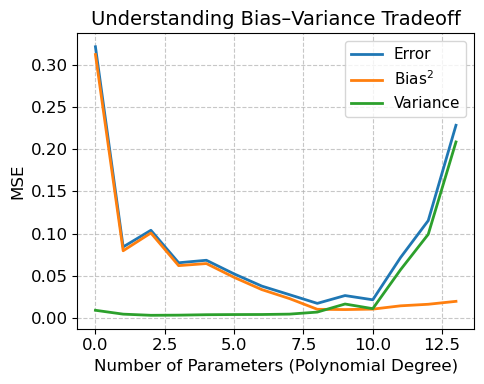

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)
plt.rcParams.update({
    "font.size": 12   # match LaTeX text size (10, 11, or 12pt depending on your doc class)
})

plt.figure(figsize=(5,4)) 


n = 40
n_boostraps = 100
maxdegree = 14

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
    bias[degree] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
    variance[degree] = np.mean(np.var(y_pred, axis=1, keepdims=True))

# ---- Plot ----
plt.figure(figsize=(5,4))
plt.plot(polydegree, error, label='Error', linewidth=2)
plt.plot(polydegree, bias, label='Bias$^2$', linewidth=2)
plt.plot(polydegree, variance, label='Variance', linewidth=2)

plt.xlabel("Number of Parameters (Polynomial Degree)", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("Understanding Bias–Variance Tradeoff", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("bias_variance.png", dpi=300)  # High-res for Overleaf
plt.show()


## Exercise 3: Writing an abstract and introduction


Although much of your project 1 results are not done yet, we want you to write an abstract and introduction to get you started on writing the report. It is generally a good idea to write a lot of a report before finishing all of the results, as you get a better understanding of your methods and inquiry from doing so, along with saving a lot of time. Where you would typically describe results in the abstract, instead make something up, just this once.

**a)** Read the guidelines on abstract and introduction before you start.

**b)** Write an abstract for project 1 in your report.

**c)** Write an introduction for project 1 in your report.


## Exercise 4: Making the code available and presentable


A central part of the report is the code you write to implement the methods and generate the results. To get points for the code-part of the project, you need to make your code avaliable and presentable.

**a)** Create a github repository for project 1, or create a dedicated folder for project 1 in a github repository. Only one person in your group needs to do this.

**b)** Add a PDF of the report to this repository, after completing exercises 1-3

**c)** Add a folder named Code, where you can put python files for your functions and notebooks for reproducing your results.

**d)** Add python files for functions, and a notebook to produce the figures in exercise 2, to the Code folder. Remember to use a seed for generating random data and for train-test splits.

**e)** Create a README file in the repository or project folder with

- the name of the group members
- a short description of the project
- a description of how to install the required packages to run your code from a requirements.txt file
- names and descriptions of the various notebooks in the Code folder and the results they produce


## Exercise 5: Referencing

**a)** Add a reference to Hastie et al. using your preferred referencing style. See https://www.sokogskriv.no/referansestiler/ for an overview of styles.

**b)** Add a reference to sklearn like this: https://scikit-learn.org/stable/about.html#citing-scikit-learn

**c)** Make a prompt to your LLM of choice, and upload the exported conversation to your GitHub repository for the project.

**d)** At the end of the methods section of the report, write a one paragraph declaration on how and for what you have used the LLM. Link to the log on GitHub.
